In [1]:
import pandas as pd 
returnsant=pd.read_csv('returnsant.csv')

In [2]:
returnsant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perf_date                         195 non-null    object 
 1   Hedge Fund                        195 non-null    float64
 2   Factor - Low Risk                 195 non-null    float64
 3   Factor - Value vs Growth          195 non-null    float64
 4   Factor - Fixed Income Carry       195 non-null    float64
 5   Factor - Local Equity             195 non-null    float64
 6   Factor - Trend Following          195 non-null    float64
 7   Factor - Commodities              195 non-null    float64
 8   Factor - Equity                   195 non-null    float64
 9   Factor - Foreign Exchange Carry   195 non-null    float64
 10  Factor - Small Cap                195 non-null    float64
 11  Factor - Emerging Markets         195 non-null    float64
 12  Factor -

In [3]:
returnsant.describe()

,Hedge Fund,Factor - Low Risk,Factor - Value vs Growth,Factor - Fixed Income Carry,Factor - Local Equity,Factor - Trend Following,Factor - Commodities,Factor - Equity,Factor - Foreign Exchange Carry,Factor - Small Cap,Factor - Emerging Markets,Factor - Foreign Currency,Factor - Local Inflation,Factor - Equity Short Volatility,Factor - Credit,Factor - Interest Rates,Factor - Crowding,Factor - Momentum,Factor - Quality
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.008426,0.005162,150.222145,0.000084,-0.000999,0.005613,-0.001761,0.006200,-0.000083,-0.002021,-0.002571,0.001120,0.002171,0.001245,0.000228,165.289979,0.002219,0.005333,0.006526
std,0.029623,0.028541,2569.592857,0.019464,0.021516,0.026661,0.020470,0.040760,0.020065,0.018025,0.020904,0.018551,0.022432,0.018643,0.027555,1725.936406,0.009019,0.032067,0.015723
min,-0.096051,-0.128207,-12739.631010,-0.075152,-0.081331,-0.072346,-0.060501,-0.149934,-0.063892,-0.090379,-0.125790,-0.038892,-0.085123,-0.052001,-0.170308,-0.028068,-0.052240,-0.127459,-0.040496
25%,-0.009950,-0.011406,-0.015540,-0.010146,-0.014698,-0.010551,-0.013445,-0.014444,-0.010376,-0.011469,-0.013991,-0.010622,-0.008966,-0.009227,-0.009373,-0.003997,-0.000932,-0.011822,-0.001276
50%,0.008800,0.004758,-0.000972,0.001565,-0.000484,0.003492,-0.001189,0.012433,0.001187,-0.001049,-0.000205,0.000475,0.000509,0.004018,0.003766,0.002805,0.001267,0.007850,0.007147
75%,0.028000,0.023451,0.011636,0.011342,0.012546,0.020816,0.011129,0.028201,0.013087,0.009227,0.010226,0.011589,0.012679,0.012631,0.017425,0.009257,0.007310,0.024615,0.014936
max,0.087900,0.076999,31963.201490,0.065239,0.056810,0.102276,0.058252,0.115115,0.071994,0.069783,0.037207,0.067272,0.081401,0.040368,0.057066,23213.711040,0.028112,0.124979,0.084840


In [4]:
hedgefund=returnsant['Hedge Fund']

In [5]:
hedgefund.isnull().sum()

0

<AxesSubplot:>

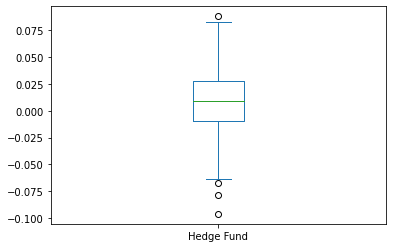

In [6]:
hedgefund.plot(kind='box')

# ~ LogN(0,1) skewed towards the right
# Now we consider its seasonality and stationarity
# Decomposotion will be performed to see if ADF test is able to 
# disect the seasonality


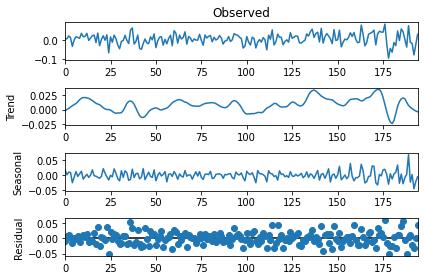

In [7]:
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
res = STL(hedgefund.values.reshape(-1,1),period=6).fit()
res.plot()
plt.show()

In [8]:
res?

Type:        DecomposeResult
String form: <statsmodels.tsa.seasonal.DecomposeResult object at 0x7fdb03216c10>
File:        ~/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/seasonal.py
Docstring:  
Results class for seasonal decompositions

Parameters
----------
observed : array_like
    The data series that has been decomposed.
seasonal : array_like
    The seasonal component of the data series.
trend : array_like
    The trend component of the data series.
resid : array_like
    The residual component of the data series.
weights : array_like, optional
    The weights used to reduce outlier influence.


In [9]:
season=pd.Series(res.seasonal)
trendy=pd.Series(res.trend)
regress=hedgefund -season- trendy


In [10]:
regress

0     -0.008090
1      0.006571
2      0.011667
3      0.001066
4     -0.014368
         ...   
190    0.008765
191   -0.021046
192   -0.033156
193    0.001417
194    0.041312
Length: 195, dtype: float64

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


,pvalue
original,8.511384e-20
regress,1.114713e-11
seasonfirstdiff,2.544166e-20
firstdiffhedge,4.229823e-13
secdiffhedge,1.968606e-12
standardhedge,4.436187e-23
boxcoxh,2.332933e-23


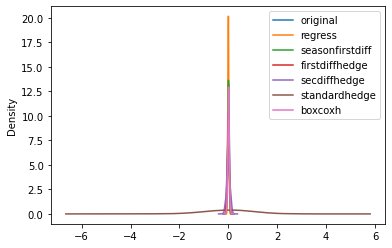

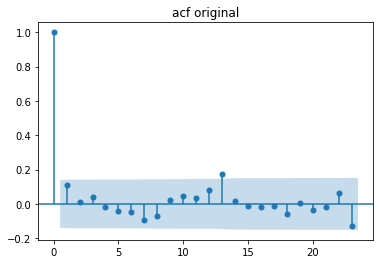

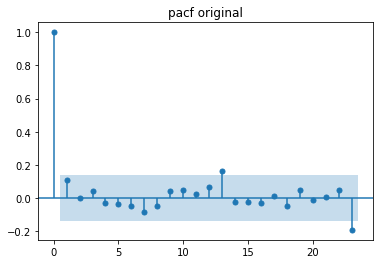

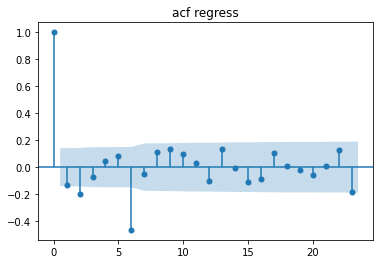

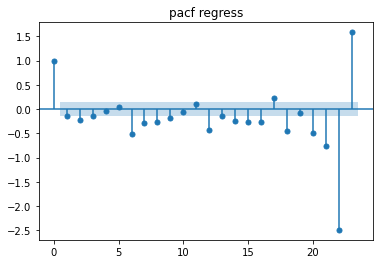

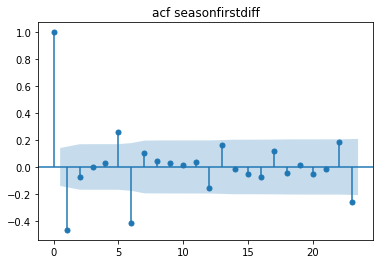

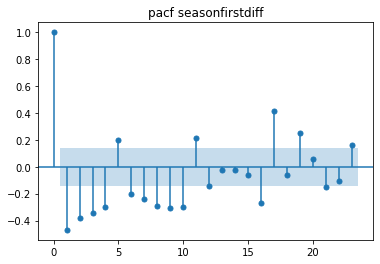

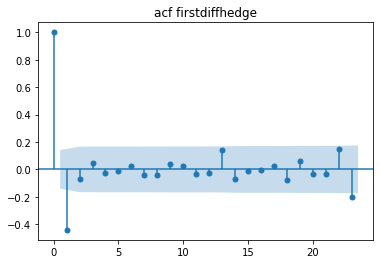

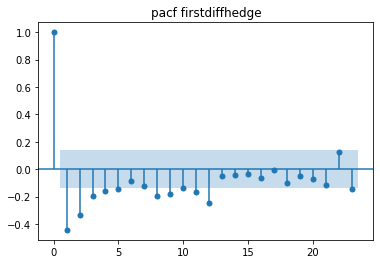

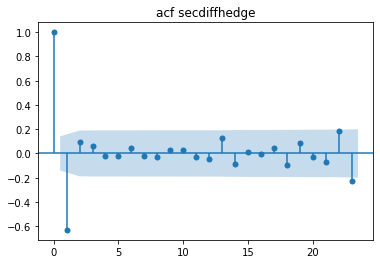

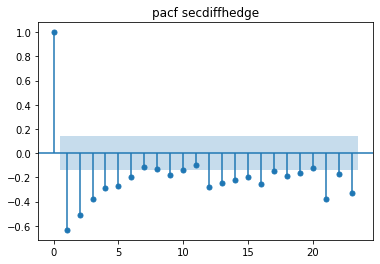

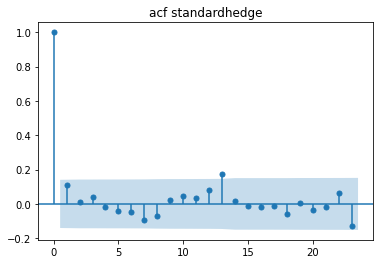

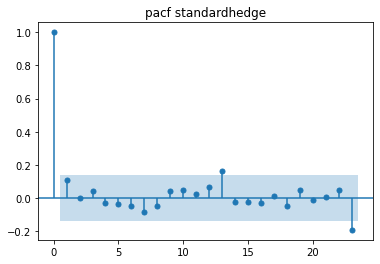

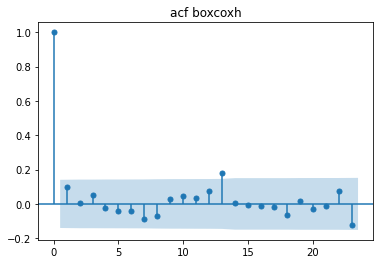

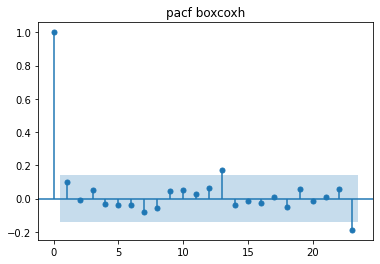

In [11]:
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import *
from pmdarima.preprocessing import BoxCoxEndogTransformer
from scipy import stats
import numpy as np

fig,ax=plt.subplots()
#loghedge=pd.DataFrame(np.log(hedgefund.values))
seasonfirstdiff=regress.diff().dropna()
firstdiffhedge=hedgefund.diff().dropna()
secdiffhedge=firstdiffhedge.diff().dropna()
standardhedge=pd.DataFrame(StandardScaler().fit_transform(hedgefund.values.reshape(-1,1)))
hedgeplusthree=hedgefund + 3
boxcoxh=BoxCoxEndogTransformer().fit_transform(hedgefund.values.reshape(-1,1)+1)[0]
boxcoxh=pd.DataFrame (boxcoxh)
#boxcoxhedge=pd.DataFrame(stats.boxcox((hedgeplusthree.values)))
loghedge=pd.DataFrame(np.log(hedgeplusthree.values.reshape(-1,1)))
exphedge=pd.DataFrame(np.exp(hedgefund.values.reshape(-1 , 1)))
transformed=[hedgefund,regress,seasonfirstdiff,firstdiffhedge,secdiffhedge,standardhedge, boxcoxh]
transnames=['original','regress','seasonfirstdiff','firstdiffhedge','secdiffhedge','standardhedge','boxcoxh']

hedgefund.plot(kind='kde',ax=ax)
plot_acf(hedgefund.values,title='acf '+transnames[0])
plot_pacf(hedgefund.values,title='pacf '+transnames[0])

regress.plot(kind='kde',ax=ax)
plot_acf(regress.values,title='acf '+transnames[1])
plot_pacf(regress.values,title='pacf '+transnames[1])

seasonfirstdiff.plot(kind='kde',ax=ax)
plot_acf(seasonfirstdiff.values,title='acf '+transnames[2])
plot_pacf(seasonfirstdiff.values,title='pacf '+transnames[2])

firstdiffhedge.plot( kind='kde',ax=ax)
plot_acf(firstdiffhedge.values,title='acf '+transnames[3])
plot_pacf(firstdiffhedge.values,title='pacf '+transnames[3])

secdiffhedge.plot( kind='kde',ax=ax)
plot_acf(secdiffhedge.values,title='acf '+transnames[4])
plot_pacf(secdiffhedge.values,title='pacf '+transnames[4])

standardhedge.plot( kind='kde',ax=ax)
plot_acf(standardhedge.values,title='acf '+transnames[5])
plot_pacf(standardhedge.values,title='pacf '+transnames[5])

boxcoxh.plot( kind='kde',ax=ax)
plot_acf(boxcoxh.values,title='acf '+transnames[6])
plot_pacf(boxcoxh.values,title='pacf '+transnames[6])

#loghedge.plot(kind='kde',ax=ax)
#plot_acf(loghedge.values,title='acf '+transnames[6])
#plot_pacf(loghedge.values,title='pacf '+transnames[6])

#exphedge.plot(kind='kde',ax=ax)
#plot_acf(exphedge.values,title='acf '+transnames[7])
#plot_pacf(exphedge.values,title='pacf '+transnames[7])


print()
ax.legend(transnames)

adfres=[]
missingvalexp=[]
for t,transname in zip(transformed,transnames):
    missingvalexp.append(t.isnull().sum())
    
    if transname=='original':
        adfres.append(adfuller(t.dropna().values.reshape(-1,1),regression='ct')[1])
    elif (transname=='regress')|(transname=='seasonfirstdiff'):
         adfres.append(adfuller(t.dropna().values.reshape(-1,1),regression='nc')[1])
    else:
        adfres.append(adfuller(t.dropna().values.reshape(-1,1))[1])
        continue
#missingvalexp=np.array(missingvalexp).reshape(len(transnames),1,dtype='O')
adfres=np.array(adfres).reshape(len(transnames),1)
adfrespd=pd.DataFrame(adfres)
#adfrespd['Stationary Values BOOL']=
#adfrespd['Missing Values BOOL']=missingvalexp
adfrespd.index=transnames
adfrespd.columns=['pvalue']
adfrespd.head(len(transnames))
#boxcoxhedge.plot(kind='kde',axis=ax)

In [12]:
import pmdarima as pm


y_train=hedgefund.values.reshape(-1,1)[0:184]
y_test=hedgefund.values.reshape(-1,1)[184:195]

dlist=[1,2]
for d in dlist:
    stepwise_fit = pm.auto_arima(y_train, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=1,
                             start_P=0, seasonal=True,
                             d=d, D=0, trace=True,
                             error_action='trace',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to s
    stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-675.525, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-712.477, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-677.518, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-735.826, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-738.387, Time=0.06 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-769.799, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-768.375, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-770.042, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-768.200, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-767.114, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0

In [38]:
mod=pm.arima.ARIMA((3,2,0),(0,0,0,0),trace=True )
mod.fit(y_train)
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  184
Model:               SARIMAX(3, 2, 0)   Log Likelihood                 329.377
Date:                Tue, 20 Dec 2022   AIC                           -648.754
Time:                        17:17:17   BIC                           -632.734
Sample:                             0   HQIC                          -642.260
                                - 184                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.003      0.190      0.849      -0.005       0.007
ar.L1         -1.1468      0.065    -17.663      0.000      -1.274      -1.020
ar.L2         -0.8793      0.079    -11.093      0.000      -1.035      -0.724
ar.L3         -0.3489      0.066     -5.293      0.000      -0.478      -0.220
sigma2         0.0016      0.000     10.080      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   2.48   Jarque-Bera (JB):                 4.62
Prob(Q):                              0.12   Prob(JB):                         0.10
Heteroskedasticity (H):               1.38   Skew:                            -0.32
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
y_train2= boxcoxh[0][0:184]
y_test2 =boxcoxh[0][184:195]
dlist=[1,2]
for d in dlist:
    stepwise_fit = pm.auto_arima(y_train2, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=1,
                             start_P=0, seasonal=True,
                             d=d, D=0, trace=True,
                             error_action='trace',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to s
    stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-668.652, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-705.892, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-670.644, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-730.821, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-733.154, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-763.015, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-765.241, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-763.196, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-766.869, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-768.863, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-768.884, T

In [39]:
mod2=pm.arima.ARIMA((3,2,0),(0,0,0,0),trace=True )
mod2.fit(y_train2)
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  184
Model:               SARIMAX(3, 2, 0)   Log Likelihood                 326.622
Date:                Tue, 20 Dec 2022   AIC                           -643.245
Time:                        17:17:32   BIC                           -627.225
Sample:                             0   HQIC                          -636.751
                                - 184                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.003      0.188      0.851      -0.005       0.007
ar.L1         -1.1518      0.064    -17.928      0.000      -1.278      -1.026
ar.L2         -0.8884      0.081    -11.025      0.000      -1.046      -0.730
ar.L3         -0.3491      0.065     -5.375      0.000      -0.476      -0.222
sigma2         0.0016      0.000     10.240      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   2.48   Jarque-Bera (JB):                 4.29
Prob(Q):                              0.12   Prob(JB):                         0.12
Heteroskedasticity (H):               1.47   Skew:                            -0.30
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model1 = mod # seeded from the model we've already fit

def forecast_one_step(model):
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in y_test:
    fc, conf = forecast_one_step(model1)
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model1.update(new_ob)

print(f"Mean squared error: {mean_squared_error(y_test, forecasts)}")
print(f"SMAPE: {smape(y_test, forecasts)}")

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/s

Mean squared error: 0.004407356581753677
SMAPE: 158.4398142829289


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model2 = mod2 # seeded from the model we've already fit

forecasts2 = []
confidence_intervals2 = []

for new_ob in y_test2:
    fc, conf = forecast_one_step(model2)
    forecasts2.append(fc)
    confidence_intervals2.append(conf)

    # Updates the existing model with a small number of MLE steps
    model2.update(new_ob)

print(f"Mean squared error: {mean_squared_error(y_test2, forecasts)}")
print(f"SMAPE: {smape(y_test2, forecasts)}")

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/s

Mean squared error: 0.004483367627095109
SMAPE: 158.66601728407906


/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


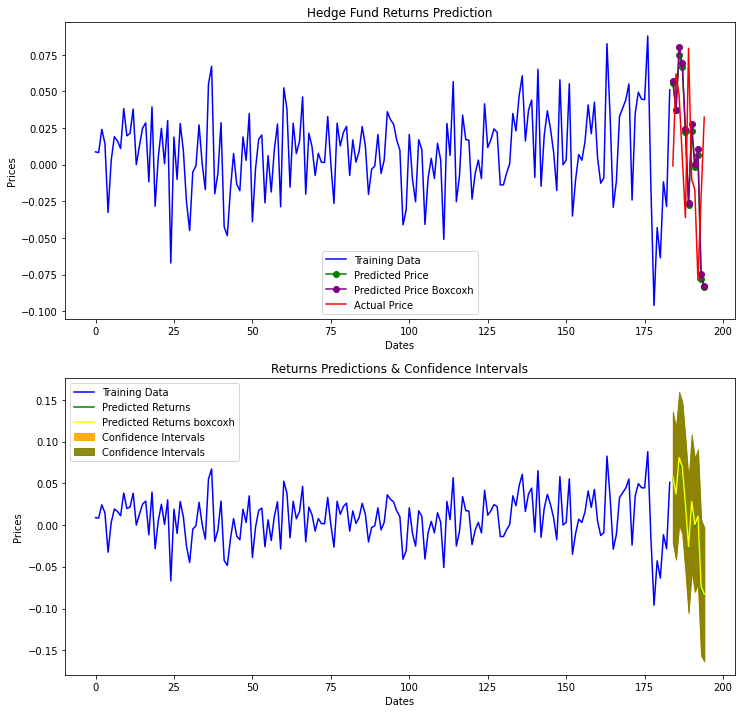

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Actual vs. Predicted 
axes[0].plot(y_train, color='blue', label='Training Data')
axes[0].plot(hedgefund.index[184:195], forecasts, color='green', marker='o',
             label='Predicted Price')
axes[0].plot(hedgefund.index[184:195], forecasts2, color='purple', marker='o',
             label='Predicted Price Boxcoxh')

axes[0].plot(hedgefund.index[184:195], y_test, color='red', label='Actual Price')
axes[0].set_title('Hedge Fund Returns Prediction')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Prices')

axes[0].legend()
axes[0].legend()


#Predicted with confidence intervals

axes[1].plot(y_train, color='blue', label='Training Data')
axes[1].plot(hedgefund.index[184:195], forecasts, color='green',
             label='Predicted Returns')
axes[1].plot(hedgefund.index[184:195], forecasts2, color='yellow',
             label='Predicted Returns boxcoxh')

axes[1].set_title('Returns Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')

conf_int = np.asarray(confidence_intervals)
conf_int2 = np.asarray(confidence_intervals2)
axes[1].fill_between(hedgefund.index[184:195],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")
axes[1].fill_between(hedgefund.index[184:195],
                     conf_int2[:, 0], conf_int2[:, 1],
                     alpha=0.9, color='olive',
                     label="Confidence Intervals")




axes[1].legend()

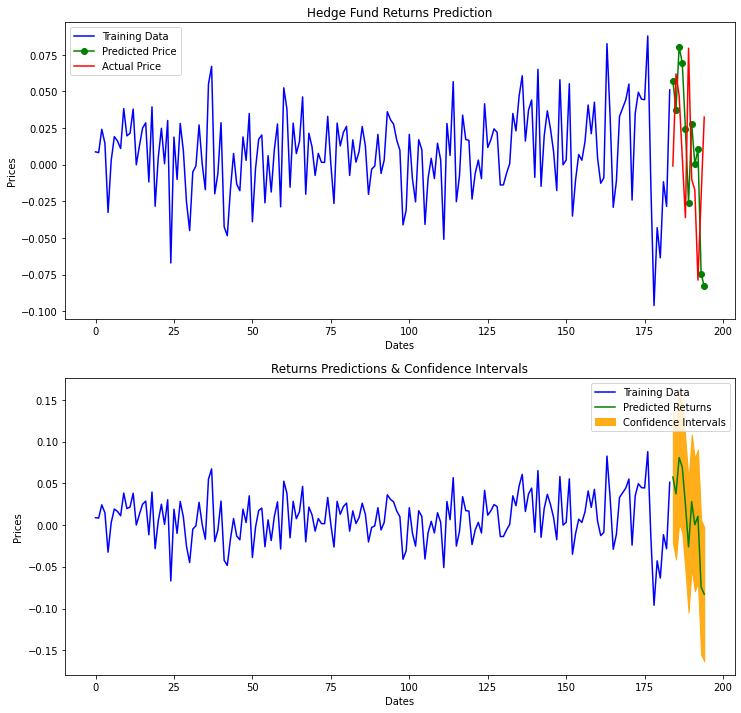

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

#Actual vs. Predicted
axes[0].plot(y_train, color='blue', label='Training Data')
axes[0].plot(hedgefund.index[184:195], forecasts2, color='green', marker='o',
             label='Predicted Price')

axes[0].plot(hedgefund.index[184:195], y_test, color='red', label='Actual Price')
axes[0].set_title('Hedge Fund Returns Prediction')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Prices')

axes[0].legend()
axes[0].legend()


# Predicted with confidence intervals
axes[1].plot(y_train, color='blue', label='Training Data')
axes[1].plot(hedgefund.index[184:195], forecasts2, color='green',
             label='Predicted Returns')

axes[1].set_title('Returns Predictions & Confidence Intervals')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Prices')


axes[1].fill_between(hedgefund.index[184:195],
                     conf_int2[:, 0], conf_int2[:, 1],
                     alpha=0.9, color='orange',
                     label="Confidence Intervals")


axes[1].legend()

# Sloppy approach

In [20]:
var=mod.resid()**2
# package does this in statsmodels they know we are dumb and forgetful

In [21]:
from statsmodels.stats.diagnostic import het_breuschpagan as bp
bp(mod.resid(),hedgefund.values[0:195].reshape(-1,1))
# clearly by the F test W high sig is not heterosckedastic 

(0.04850958565304264, nan, 0.04827282723866378, 0.8263274174984445)

<AxesSubplot:ylabel='Density'>

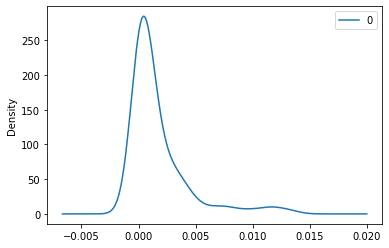

In [22]:
pd.DataFrame(var).plot(kind='kde')

In [23]:
from statsmodels.stats.stattools import durbin_watson as db
db(mod.resid())

2.18000539172971

In [25]:
from scipy.stats import shapiro as sw
sw(mod.resid())

ShapiroResult(statistic=0.9869568943977356, pvalue=0.06955743581056595)

# CS approach

In [32]:
class resanalysis():
    def __init__(self,res,exog):
        self.res=res
        self.var=res**2
        self.exog=exog
    
    def densityplot(self):
        pd.DataFrame(self.var).plot(kind='kde')
    
    def homotest(self):
        pvaluef=bp(self.res,self.exog)[3]
        if pvaluef > 0.05:
            print('The null hypothesis that the residuals are homogenous is accepted under alpha= 0.05 with p-value{}'.format(pvaluef))
    
    def serialtest(self):    
        dbtest=db(self.res)
        print("Test statistic for Durbin Watson is {} should be ~2".format(dbtest))
    
    def normalitytest(self):
        swtest=sw(self.res)[1]
        if swtest > 0.05:
            print(' The null hypothesis that the sampled population follows approximately normal is accepted{}'.format(swtest))
            
re=resanalysis(mod.resid(),hedgefund.values.reshape(-1,1))
re2=resanalysis(mod2.resid(),boxcoxh)

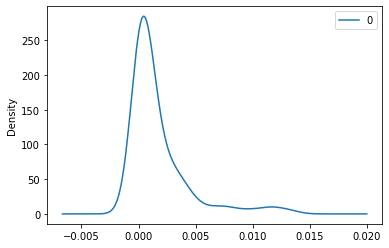

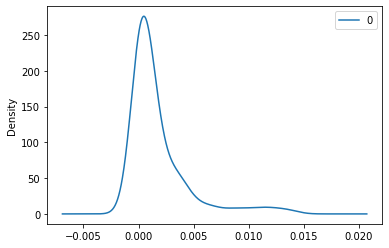

In [33]:
re.densityplot()
re2.densityplot()

In [35]:
re.homotest()
re2.homotest()

The null hypothesis that the residuals are homogenous is accepted under alpha= 0.05 with p-value0.8263274174984445
The null hypothesis that the residuals are homogenous is accepted under alpha= 0.05 with p-value0.36673266239287083


In [36]:
re.serialtest()
re2.serialtest()

Test statistic for Durbin Watson is 2.18000539172971 should be ~2
Test statistic for Durbin Watson is 2.187283972517621 should be ~2


In [37]:
re.normalitytest()
re2.normalitytest()

 The null hypothesis that the sampled population follows approximately normal is accepted0.06955743581056595
 The null hypothesis that the sampled population follows approximately normal is accepted0.05231659486889839
